In [1]:
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np

In [2]:
df = pd.read_csv( os.path.join('dataset', 'learning_data_431975.csv'), header=None  )
x = df[ df.columns[ :-1 ] ]
x=pd.DataFrame(x[(x.shape[1]-1)/2])
x.columns=[x.shape[1]-1]
y=  df[ df.columns[ -1 ] ]

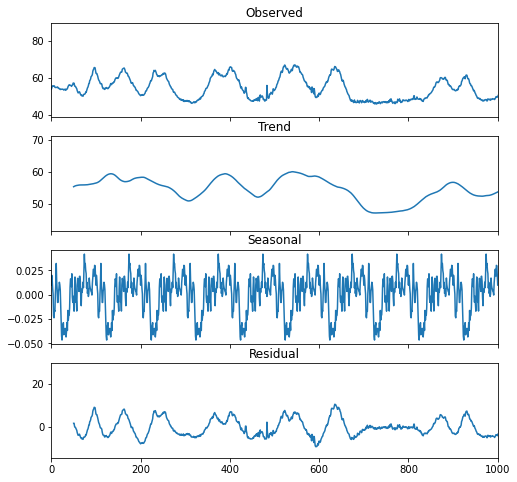

In [3]:
decompose_result = sm.tsa.seasonal_decompose(x, period=100)

# 描画する領域を用意する
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 8), sharex=True)

# 原系列
axes[0].set_title('Observed')
axes[0].plot(decompose_result.observed)

# 傾向変動
axes[1].set_title('Trend')
axes[1].plot(decompose_result.trend)

# 季節変動
axes[2].set_title('Seasonal')
axes[2].plot(decompose_result.seasonal)

# 残差 (不規則変動 = 誤差変動 + 特異的変動)
axes[3].set_title('Residual')
axes[3].plot(decompose_result.resid)

plt.xlim(0,1000)
# グラフを表示する
plt.show()


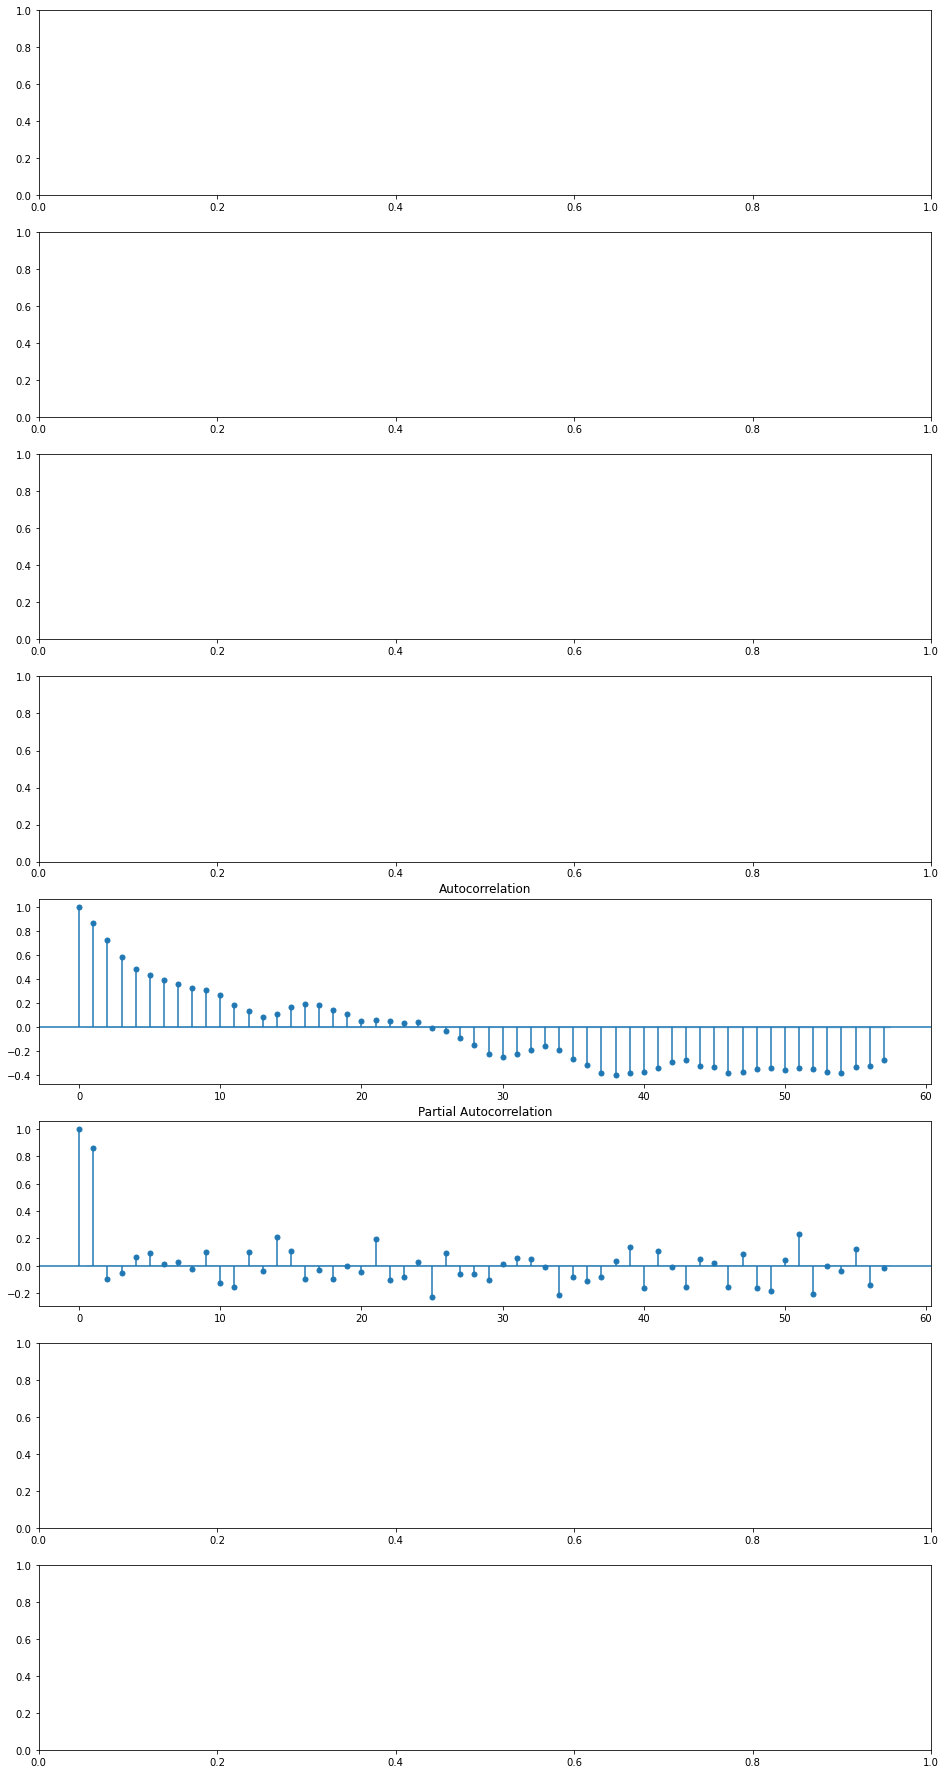

In [4]:
_, axes = plt.subplots(nrows=8, ncols=1, figsize=(16, 32))

# # 原系列
# axes[0].set_title('Observed ACF')
# # 原系列の ACF
# sm.tsa.graphics.plot_acf(x, ax=axes[0])
# # 原系列の PACF
# sm.tsa.graphics.plot_pacf(x, ax=axes[1])

# # 傾向変動
# axes[2].set_title('Trend ACF')
# # 傾向変動の ACF
# sm.tsa.graphics.plot_acf(decompose_result.trend.dropna(), ax=axes[2])
# # 傾向変動の PACF
# sm.tsa.graphics.plot_pacf(decompose_result.trend.dropna(), ax=axes[3])

# 季節変動
axes[4].set_title('Seasonal ACF')
sm.tsa.graphics.plot_acf(decompose_result.seasonal.dropna(), ax=axes[4])
sm.tsa.graphics.plot_pacf(decompose_result.seasonal.dropna(), ax=axes[5])

# # 残差 (不規則変動 = 誤差変動 + 特異的変動)
# axes[6].set_title('Residual ACF')
# sm.tsa.graphics.plot_acf(decompose_result.resid.dropna(), ax=axes[6])
# sm.tsa.graphics.plot_pacf(decompose_result.resid.dropna(), ax=axes[7])

# グラフを表示する
plt.show()

In [5]:
df_x=pd.DataFrame()
df_x['original']=decompose_result.observed
df_x['trend']=x.rolling(100).mean()
df_x['seasonal']=decompose_result.seasonal
df_x['resid']=df_x['original']-df_x['trend']-df_x['seasonal']
df_x['lavel']=y
df=df_x.dropna().reset_index(drop=True)
df

,original,trend,seasonal,resid,lavel
0,64.1,55.350,0.019967,8.730033,0
1,62.6,55.436,0.009810,7.154190,0
2,62.4,55.513,0.019937,6.867063,0
3,62.4,55.580,0.015127,6.804873,0
4,61.7,55.642,0.006422,6.051578,0
...,...,...,...,...,...
431871,55.4,57.030,0.006654,-1.636654,0
431872,56.0,57.108,0.012870,-1.120870,0
431873,55.8,57.183,0.007275,-1.390275,0
431874,57.0,57.245,0.023768,-0.268768,0


In [6]:
def make_data(x, str):
    x=pd.DataFrame(x)
    window=5
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    
    return x

lag=[]
for str in ['original', 'trend', 'seasonal', 'resid']:
    lag.append(make_data(df[str], str))

lag.append(df['lavel'])
df_add_lag=pd.concat(lag, axis=1)
df=df_add_lag.dropna().reset_index(drop=True)
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,trend,trend_lag1,trend_lag2,trend_lag3,trend_lag4,...,seasonal_lag1,seasonal_lag2,seasonal_lag3,seasonal_lag4,resid,resid_lag1,resid_lag2,resid_lag3,resid_lag4,lavel
0,61.7,62.4,62.4,62.6,64.1,55.642,55.580,55.513,55.436,55.350,...,0.015127,0.019937,0.009810,0.019967,6.051578,6.804873,6.867063,7.154190,8.730033,0
1,60.9,61.7,62.4,62.4,62.6,55.694,55.642,55.580,55.513,55.436,...,0.006422,0.015127,0.019937,0.009810,5.205225,6.051578,6.804873,6.867063,7.154190,0
2,59.8,60.9,61.7,62.4,62.4,55.736,55.694,55.642,55.580,55.513,...,0.000775,0.006422,0.015127,0.019937,4.086005,5.205225,6.051578,6.804873,6.867063,0
3,59.0,59.8,60.9,61.7,62.4,55.768,55.736,55.694,55.642,55.580,...,-0.022005,0.000775,0.006422,0.015127,3.255784,4.086005,5.205225,6.051578,6.804873,0
4,58.6,59.0,59.8,60.9,61.7,55.797,55.768,55.736,55.694,55.642,...,-0.023784,-0.022005,0.000775,0.006422,2.819187,3.255784,4.086005,5.205225,6.051578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431867,55.4,55.3,54.8,54.9,54.8,57.030,56.964,56.905,56.851,56.794,...,0.002332,0.005647,-0.011344,-0.002797,-1.636654,-1.666332,-2.110647,-1.939656,-1.991203,0
431868,56.0,55.4,55.3,54.8,54.9,57.108,57.030,56.964,56.905,56.851,...,0.006654,0.002332,0.005647,-0.011344,-1.120870,-1.636654,-1.666332,-2.110647,-1.939656,0
431869,55.8,56.0,55.4,55.3,54.8,57.183,57.108,57.030,56.964,56.905,...,0.012870,0.006654,0.002332,0.005647,-1.390275,-1.120870,-1.636654,-1.666332,-2.110647,0
431870,57.0,55.8,56.0,55.4,55.3,57.245,57.183,57.108,57.030,56.964,...,0.007275,0.012870,0.006654,0.002332,-0.268768,-1.390275,-1.120870,-1.636654,-1.666332,0


In [7]:
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import KFold
import pandas as pd
import os
import numpy as np
import support 

def under_sampling(x):
    import warnings
    import pandas as pd
    import os
    warnings.simplefilter('ignore', pd.core.common.SettingWithCopyWarning)
    df = x
    x_majority=df.loc[df.iloc[:,-1]==0]
    x_minority=df.loc[df.iloc[:,-1]==1]
    from sklearn.cluster import KMeans
    km = KMeans(random_state=1, n_clusters=10)
    km.fit(x_majority.iloc[:, :-1])
    x_majority['Cluster'] = km.predict(x_majority.iloc[:, :-1])
    ratio = x_majority['Cluster'].value_counts() / x_majority.shape[0]
    n_sample_ary = (ratio * x_minority.shape[0]).sort_index().astype('int64')
    df_Xs=[]
    for i, n_sample in enumerate(n_sample_ary):
        #重複を許すか許さないかで変わるのか？
        df_Xs.append(x_majority[x_majority['Cluster']==i].sample(n=n_sample, replace=True))

    df_Xs.append(x_minority)
    x=pd.concat(df_Xs, sort=True)
    x=x.drop('Cluster', axis=1)
    
    return x

def calc_avg(x, y):
    import pandas as pd
    import os
    df_x=pd.DataFrame(x)
    df_y=pd.DataFrame(y)
    df_x_raw=df_x[0]
    raw_df=pd.concat([df_x_raw, df_y], axis=1)
    raw_df.columns=range(raw_df.shape[1])
    df_ex=raw_df.loc[raw_df[1]==0]
    N=len(df_ex)
    Leq=10*np.log10(np.sum(np.power(10, df_ex[0]/10)))-10*np.log10(N)
    return Leq

def calc_avg2(x, y):
    import pandas as pd
    import os
    df_x=pd.DataFrame(x)
    df_y=pd.DataFrame(y)
    df_x_raw=df_x[0]
    raw_df=pd.concat([df_x_raw, df_y], axis=1)
    raw_df.columns=range(raw_df.shape[1])
    df_ex=raw_df
    N=len(df_ex)
    Leq=10*np.log10(np.sum(np.power(10, df_ex[0]/10)))-10*np.log10(N)
    return Leq

In [8]:
x = df[ df.columns[ :-1 ] ]
y=  df[ df.columns[ -1 ] ]
kf = KFold( n_splits=3, random_state=1, shuffle=True )
pr=[]
re=[]
f1 = []
ac = []
y_Leq=[]
pred_Leq=[]
no_Leq=[]
n = []

import xgboost as xgb

for train_index, test_index in kf.split( x ):
    x_train, x_test = x.loc[train_index, :].values, x.loc[test_index, :].values
    y_train, y_test = y.loc[train_index].values, y.loc[test_index].values

    # 学習データだけダウンサンプリング
    y_data=y_train[:, np.newaxis]
    data=np.concatenate([x_train, y_data], 1)
    train_df=pd.DataFrame(data)
    train_us=under_sampling(train_df)
    index = train_us.index.tolist()
    x_train=x_train[index]
    y_train=y_train[index]

    xgb_clf=xgb.XGBClassifier(n_estimators=5, max_depth=5, random_state=1234)
    xgb_clf.fit(x_train, y_train)
    z= xgb_clf.predict(x_test)
    pr.append( precision_score( y_test, z ) )
    re.append( recall_score( y_test, z) )
    f1.append( f1_score( y_test, z ) )
    ac.append( accuracy_score( y_test, z ) )
    n.append( len( x_test ) / len( x ) )

    #等価騒音レベル計算
    no_Leq.append(calc_avg2(x_test, y_test))
    y_Leq.append(calc_avg(x_test, y_test))
    pred_Leq.append(calc_avg(x_test, z))
    
print( 'CV Score:' )
print( '  Precision Score = %f'%( np.average( pr, weights=n ) ) )
print( '  Recall Score = %f'%( np.average( re, weights=n ) ) )
print( '  F1 Score = %f'%( np.average( f1, weights=n ) ) )
print( '  Accuracy Score = %f'%( np.average( ac, weights=n ) ) )
print( '  no_Leq = %f'%( np.average( no_Leq, weights=n ) ) )
print( '  y_Leq = %f'%( np.average( y_Leq, weights=n ) ) )
print( '  pred_Leq = %f'%( np.average( pred_Leq, weights=n ) ) )

C:\Users\Arakawa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:16:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Arakawa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:16:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:16:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV Score:
  Precision Score = 0.021427
  Recall Score = 0.858311
  F1 Score = 0.041809
  Accuracy Score = 0.560196
  no_Leq = 55.975039
  y_Leq = 55.936726
  pred_Leq = 54.257824


C:\Users\Arakawa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
